In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Encodage des variables

In [40]:
df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()
le_smoker = LabelEncoder()
df["smoker"] = le_smoker.fit_transform(df["smoker"])

le_sex = LabelEncoder()
df["sex"] = le_sex.fit_transform(df["sex"])

charges = df["charges"]

oh_region = OneHotEncoder()
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [41]:
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.440016,-1.010535,-0.453197,-0.909856,1.973265,0.298918,-0.565825,-0.565825,-0.610797,1.763737
1,-1.511283,0.989575,0.509049,-0.080117,-0.506774,-0.953656,-0.565825,-0.565825,1.637205,-0.566978
2,-0.798610,0.989575,0.382826,1.579361,-0.506774,-0.728588,-0.565825,-0.565825,1.637205,-0.566978
3,-0.442273,0.989575,-1.304793,-0.909856,-0.506774,0.720278,-0.565825,1.767330,-0.610797,-0.566978
4,-0.513541,0.989575,-0.292550,-0.909856,-0.506774,-0.776727,-0.565825,1.767330,-0.610797,-0.566978


In [42]:
# On enregistre le df dans un fichier csv
scaled_data.to_csv("data/medical_insurance_scaled.csv", index=False)

[1.89012566e-01 1.37993177e-01 1.32242277e-01 1.31499674e-01
 1.10926739e-01 1.00707132e-01 9.82936230e-02 8.59368530e-02
 1.33879583e-02 1.64053373e-32]


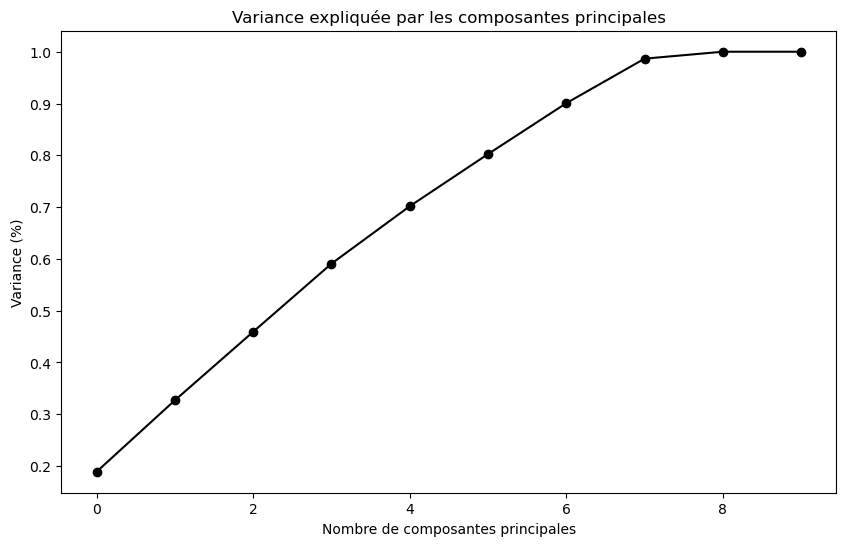

In [43]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), color="k", marker="o")
plt.xlabel("Nombre de composantes principales")
plt.ylabel("Variance (%)")
plt.title("Variance expliquée par les composantes principales")
plt.show()